In [2]:
pip install apriori

In [4]:
pip install apyori

  Using cached apyori-1.1.2.tar.gz (8.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=fd268a9d820b0c06f3cbabed4ce34c2fcf21703a2cf42fdc281f5afd9db0ba57
  Stored in directory: c:\users\x1\appdata\local\pip\cache\wheels\77\3d\a6\d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import apyori
from apyori import apriori

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Bakery.csv")
df

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend
...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [6]:
len(df)

20507

In [7]:
df["DateTime"] = pd.to_datetime(df["DateTime"])

df["day"] = df["DateTime"].apply(lambda x : x.day)
df["month"] = df["DateTime"].apply(lambda x : x.month)
df["year"] = df["DateTime"].apply(lambda x : x.year)

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["weekday"] = df["DateTime"].apply(lambda x : days[x.weekday()])

In [8]:
df = df.drop("DateTime", axis=1)
df.head()

,TransactionNo,Items,Daypart,DayType,day,month,year,weekday
0,1,Bread,Morning,Weekend,30,10,2016,Sunday
1,2,Scandinavian,Morning,Weekend,30,10,2016,Sunday
2,2,Scandinavian,Morning,Weekend,30,10,2016,Sunday
3,3,Hot chocolate,Morning,Weekend,30,10,2016,Sunday
4,3,Jam,Morning,Weekend,30,10,2016,Sunday


In [9]:
len(df["TransactionNo"].value_counts())

9465

In [10]:
val_counts = dict(df["Items"].value_counts()[:10])


# 🔸 What are the top 10 products sold the most?

<Axes: >

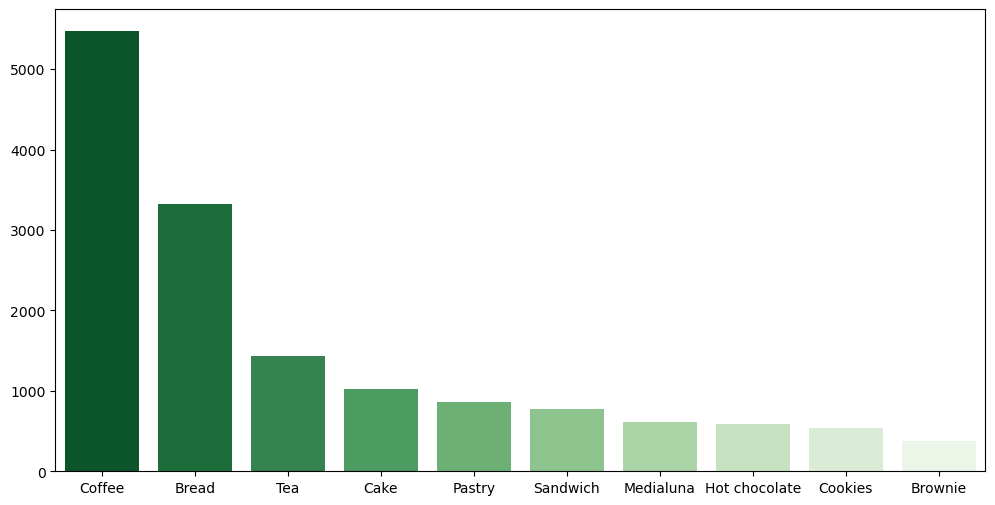

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(x=list(val_counts.keys()), y=list(val_counts.values()), palette="Greens_r")

# 🔸 At which part of the day are they mostly sold?

In [12]:
daypart = dict(df.groupby('Daypart')['Items'].count().sort_values(ascending=False))


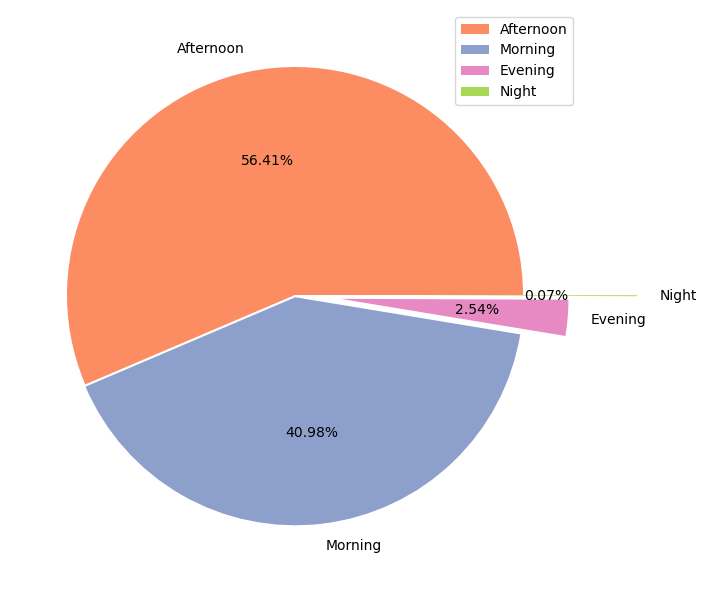

In [13]:
plt.figure(figsize=(10,6))
plt.pie(daypart.values(), labels=daypart.keys(), explode=[0, 0.01, 0.2, 0.5], colors = sns.color_palette("Set2")[1:], autopct='%.2f%%')
plt.tight_layout()
plt.legend()
plt.show()

# 🔸 When do sales increase frequently? Weekday or weekend?

In [14]:
daytype = dict(df.groupby("DayType")["Items"].count().sort_values(ascending=False))


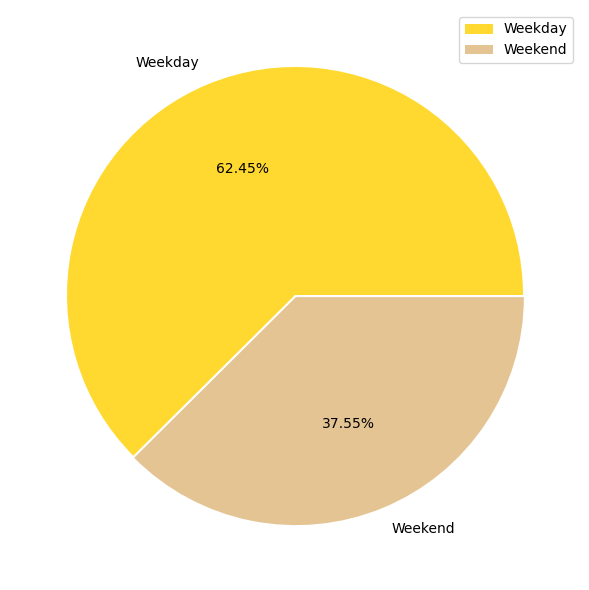

In [15]:
plt.figure(figsize=(10,6))
plt.pie(daytype.values(), labels=daytype.keys(), explode = [0, 0.01], colors = sns.color_palette("Set2")[5:7], autopct='%.2f%%')
plt.tight_layout()
plt.legend()
plt.show()

In [16]:
weekday = dict(df.groupby("weekday")["Items"].count().sort_values(ascending=False))

<Axes: >

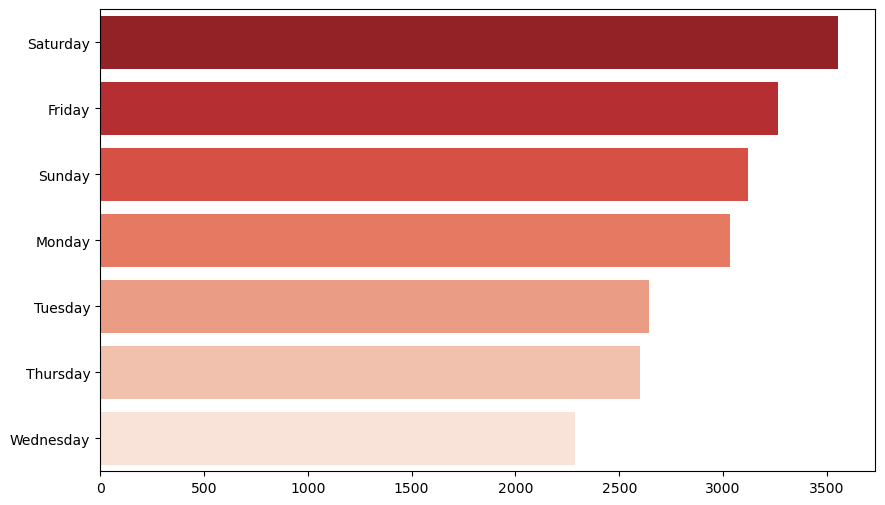

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(y=list(weekday.keys()), x=list(weekday.values()), palette="Reds_r", orient = "h")

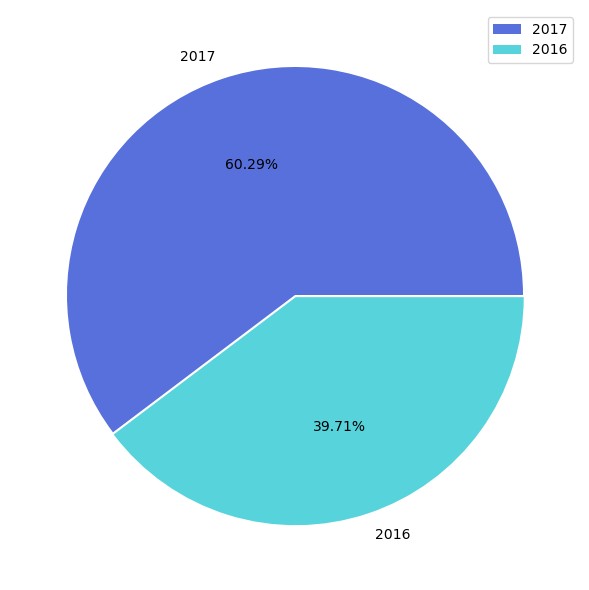

In [29]:
year = dict(df.groupby("year")["Items"].count().sort_values(ascending=False))
plt.figure(figsize=(10,6))
plt.pie(year.values(), labels=year.keys(), explode = [0, 0.01], colors = sns.color_palette("hls",8)[5:3:-1], autopct='%.2f%%')
plt.tight_layout()
plt.legend()
plt.show()

<Axes: >

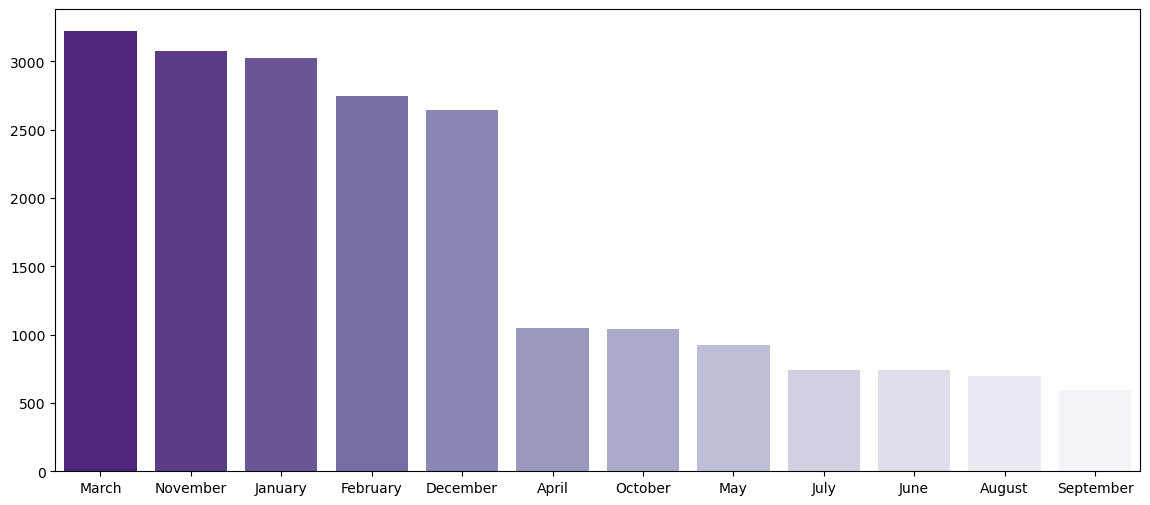

In [18]:
month = dict(df.groupby("month")["Items"].count().sort_values(ascending=False))
plt.figure(figsize=(14,6))
sns.barplot(x=["March", "November", "January", "February", "December", "April", "October", "May", "July", "June", "August", "September"], 
            y=list(month.values()), palette="Purples_r")

In [19]:
val_counts = df["Items"].value_counts()
val_counts.tail(10)

Chimichurri Oil    2
Siblings           2
Chicken sand       1
The BART           1
Adjustment         1
Bacon              1
Gift voucher       1
Olum & polenta     1
Raw bars           1
Polenta            1
Name: Items, dtype: int64

In [20]:
excluded = list(val_counts[val_counts.values < 2].index)

# 🔸 Which items are frequently sold together?

In [24]:
transactions=[]
for action in df["TransactionNo"].unique():
    transaction=list(set(df[df["TransactionNo"]==action]['Items']))
    if not any(x in transaction for x in excluded):
        if len(transaction) != 1:
            transactions.append(transaction)

In [25]:
len(transactions)

5510

In [26]:
transactions[0:20]

[['Hot chocolate', 'Cookies', 'Jam'],
 ['Bread', 'Coffee', 'Pastry'],
 ['Medialuna', 'Muffin', 'Pastry'],
 ['Medialuna', 'Coffee', 'Tea', 'Pastry'],
 ['Bread', 'Pastry'],
 ['Bread', 'Muffin'],
 ['Medialuna', 'Scandinavian'],
 ['Bread', 'Medialuna'],
 ['Coffee', 'Jam', 'Tea', 'Tartine', 'Pastry'],
 ['Basket', 'Bread', 'Coffee'],
 ['Bread', 'Medialuna', 'Pastry'],
 ['Scandinavian', 'Mineral water'],
 ['Bread', 'Medialuna', 'Coffee'],
 ['Bread', 'Farm House'],
 ['Bread', 'Medialuna'],
 ['Bread', 'Medialuna', 'Coffee'],
 ['Scandinavian', 'Muffin'],
 ['Bread', 'Coffee'],
 ['Bread', 'Jam'],
 ['Scandinavian', 'Muffin']]

In [ ]:
#from mlxtend.frequent_patterns import association_rules
#from mlxtend.frequent_patterns import apriori
#frequent_itemsets = apriori(df, min_support = 0.00000001,max_len = 2, use_colnames = True)

In [69]:
rules = apriori(transactions,min_support=0.00030,min_confidance=0.7,min_lift=3,min_length=3,target="rules")
association_results = list(rules)

In [70]:
for item in association_results:

    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    print("Support: " + str(item[1]))

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: Argentina Night -> Afternoon with the baker
Support: 0.0003629764065335753
Confidence: 0.16666666666666663
Lift: 229.5833333333333
Rule: Afternoon with the baker -> Spanish Brunch
Support: 0.0003629764065335753
Confidence: 0.16666666666666663
Lift: 5.46626984126984
Rule: Crepes -> Alfajores
Support: 0.0003629764065335753
Confidence: 0.006269592476489028
Lift: 5.757575757575757
Rule: Dulce de Leche -> Alfajores
Support: 0.000544464609800363
Confidence: 0.009404388714733543
Lift: 5.757575757575758
Rule: Frittata -> Art Tray
Support: 0.0003629764065335753
Confidence: 0.05405405405405405
Lift: 3.918918918918919
Rule: Hack the stack -> Art Tray
Support: 0.0003629764065335753
Confidence: 0.05405405405405405
Lift: 148.9189189189189
Rule: Art Tray -> Hearty & Seasonal
Support: 0.0003629764065335753
Confidence: 0.05405405405405405
Lift: 3.2729432729432726
Rule: Juice -> Art Tray
Support: 0.0012704174228675136
Confidence: 0.1891891891891892
Lift: 3.0303268384663733
Rule: Art Tray -> My-5 F

In [108]:
for item in association_results:
    print (item[0])

frozenset({'Argentina Night', 'Afternoon with the baker'})
frozenset({'Afternoon with the baker', 'Spanish Brunch'})
frozenset({'Crepes', 'Alfajores'})
frozenset({'Dulce de Leche', 'Alfajores'})
frozenset({'Frittata', 'Art Tray'})
frozenset({'Hack the stack', 'Art Tray'})
frozenset({'Art Tray', 'Hearty & Seasonal'})
frozenset({'Juice', 'Art Tray'})
frozenset({'Art Tray', 'My-5 Fruit Shoot'})
frozenset({'Salad', 'Art Tray'})
frozenset({'Soup', 'Art Tray'})
frozenset({'Spanish Brunch', 'Art Tray'})
frozenset({'Baguette', 'Scandinavian'})
frozenset({'Cookies', 'Bare Popcorn'})
frozenset({'Juice', 'Bare Popcorn'})
frozenset({'Hot chocolate', 'Basket'})
frozenset({'Brownie', 'My-5 Fruit Shoot'})
frozenset({'Coke', 'Chicken Stew'})
frozenset({'Granola', 'Chicken Stew'})
frozenset({'Spanish Brunch', 'Chicken Stew'})
frozenset({'Coke', 'Chocolates'})
frozenset({'Hot chocolate', 'Chocolates'})
frozenset({'Chocolates', 'Juice'})
frozenset({'Christmas common', 'Jam'})
frozenset({'Coke', 'Crisps'}